In [131]:
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker


In [132]:
# loading the data
file_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data\coffee_shop_sales.csv'
df = pd.read_csv(file_path)



# date & and time type convertion
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time 

# creating the revenue column
df['revenue'] = df['transaction_qty'] * df['unit_price']

# GENERAL INSPECTION:

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  revenue           149116 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.7+ MB


In [134]:
# cheking if there are any missing data (Nulls)
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
revenue             0
dtype: int64

In [135]:
df.describe(include= 'all')

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
count,149116.000000,149116,149116,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116,149116,149116,149116.000000
unique,NaN,NaN,25762,NaN,NaN,3,NaN,NaN,9,29,80,NaN
top,NaN,NaN,09:31:15,NaN,NaN,Hell's Kitchen,NaN,NaN,Coffee,Brewed Chai tea,Chocolate Croissant,NaN
freq,NaN,NaN,41,NaN,NaN,50735,NaN,NaN,58416,17183,3076,NaN
mean,74737.371872,2023-04-15 11:50:32.173609984,NaN,1.438276,5.342063,NaN,47.918607,3.382219,NaN,NaN,NaN,4.686367
min,1.000000,2023-01-01 00:00:00,NaN,1.000000,3.000000,NaN,1.000000,0.800000,NaN,NaN,NaN,0.800000
25%,37335.750000,2023-03-06 00:00:00,NaN,1.000000,3.000000,NaN,33.000000,2.500000,NaN,NaN,NaN,3.000000
50%,74727.500000,2023-04-24 00:00:00,NaN,1.000000,5.000000,NaN,47.000000,3.000000,NaN,NaN,NaN,3.750000
75%,112094.250000,2023-05-30 00:00:00,NaN,2.000000,8.000000,NaN,60.000000,3.750000,NaN,NaN,NaN,6.000000
max,149456.000000,2023-06-30 00:00:00,NaN,8.000000,8.000000,NaN,87.000000,45.000000,NaN,NaN,NaN,360.000000


In [136]:
# checking for duplicate rows: 
print(f" number of duplicate rows: {df['transaction_id'].duplicated().sum()}")

 number of duplicate rows: 0


In [137]:
# sampling the date and time columns:
df[['transaction_date', 'transaction_time']].sample(5) 

,transaction_date,transaction_time
116002,2023-06-02,19:24:46
49459,2023-03-23,16:09:07
143236,2023-06-25,16:08:45
139842,2023-06-22,18:20:40
66804,2023-04-15,08:20:15


# DATE & TIME


## Hour

In [138]:
print(f"Earlies transaction time: {df['transaction_time'].min()}")
print(f"Latest transaxtion time: {df['transaction_time'].max()}")
      

Earlies transaction time: 06:00:00
Latest transaxtion time: 20:59:32


In [139]:
# creating a time range column with 1 hour intervals: 
hours = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour 

df['time_range'] = (
    hours.astype(str) + ' - ' + (hours + 1).astype(str) 
) 


In [140]:
# hourly transaction count
df['time_range'].value_counts().sort_values(ascending=False).to_frame()

,count
time_range,
10 - 11,18545
9 - 10,17764
8 - 9,17654
7 - 8,13428
11 - 12,9766
16 - 17,9093
15 - 16,8979
14 - 15,8933
17 - 18,8745


In [141]:
# hourly sales volume 
df.groupby('time_range')['transaction_qty'].sum().to_frame().sort_values(by='transaction_qty', ascending=False)

,transaction_qty
time_range,
10 - 11,26713
9 - 10,25370
8 - 9,25197
7 - 8,19449
11 - 12,14035
15 - 16,12923
14 - 15,12907
16 - 17,12881
17 - 18,12700


In [142]:
# hourly revenue
df.groupby('time_range')['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False)


,revenue
time_range,
10 - 11,88673.39
9 - 10,85169.53
8 - 9,82699.87
7 - 8,63526.47
11 - 12,46319.14
15 - 16,41733.10
14 - 15,41304.74
16 - 17,41122.75
13 - 14,40367.45


## Day 

In [143]:
# extracting the weekday name 
df['day_name'] = df['transaction_date']. dt.strftime('%a')
df['is_weekend'] = df['day_name'].apply(lambda d: True if d in ['Sat', 'Sun'] else False)
df['day_numeric'] = df['transaction_date'].dt.dayofweek
df[['day_name', 'is_weekend', 'day_numeric']]

,day_name,is_weekend,day_numeric
0,Sun,True,6
1,Sun,True,6
2,Sun,True,6
3,Sun,True,6
4,Sun,True,6
...,...,...,...
149111,Fri,False,4
149112,Fri,False,4
149113,Fri,False,4
149114,Fri,False,4


In [144]:
# daily transaction count
df['day_name'].value_counts().sort_values(ascending=False).to_frame()

,count
day_name,
Fri,21701
Thu,21654
Mon,21643
Wed,21310
Tue,21202
Sun,21096
Sat,20510


In [145]:
# daily sales volume 
df.groupby('day_name')['transaction_qty'].sum().to_frame().sort_values(by='transaction_qty', ascending=False)

,transaction_qty
day_name,
Mon,31231
Fri,31207
Thu,31162
Wed,30625
Tue,30449
Sun,30182
Sat,29614


In [146]:
# daily revenue
df.groupby('day_name')['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False)

,revenue
day_name,
Mon,101677.28
Fri,101373.00
Thu,100767.78
Wed,100313.54
Tue,99455.94
Sun,98330.31
Sat,96894.48


## Month


In [147]:
# checking the time report range of the data 
print(f"first day of the report period: {df['transaction_date'].min()}")
print(f"last day of the report period: {df['transaction_date'].max()}")
      


first day of the report period: 2023-01-01 00:00:00
last day of the report period: 2023-06-30 00:00:00


In [148]:
df['transaction_month'] = df['transaction_date'].dt.strftime('%b')
df['month_numeric'] = df['transaction_date'].dt.month


In [149]:
# monthly transaction count
df['transaction_month'].value_counts().sort_values(ascending=False).to_frame()

,count
transaction_month,
Jun,35352
May,33527
Apr,25335
Mar,21229
Jan,17314
Feb,16359


In [150]:
# monthly sales volume 
df.groupby('transaction_month')['transaction_qty'].sum().to_frame().sort_values(by='transaction_qty', ascending=False)

,transaction_qty
transaction_month,
Jun,50942
May,48233
Apr,36469
Mar,30406
Jan,24870
Feb,23550


In [151]:
# monthly revenue
df.groupby('transaction_month')['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False)

,revenue
transaction_month,
Jun,166485.88
May,156727.76
Apr,118941.08
Mar,98834.68
Jan,81677.74
Feb,76145.19


# QUANTITY, PRICES AND REVENUE


In [152]:
df[['transaction_qty', 'unit_price', 'revenue']].describe()

,transaction_qty,unit_price,revenue
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


In [153]:
# checking if transaction quantity and unit price are ever 0 or negative: 
df.query('transaction_qty <= 0 or unit_price <= 0')[['transaction_id', 'unit_price']]

,transaction_id,unit_price


In [154]:
# checking which product is the one with max price 
df.query('unit_price == 45')[['product_id','product_category']]

,product_id,product_category
5187,8,Coffee beans
5879,8,Coffee beans
5944,8,Coffee beans
7626,8,Coffee beans
8452,8,Coffee beans
...,...,...
144743,8,Coffee beans
145411,8,Coffee beans
148573,8,Coffee beans
148702,8,Coffee beans


In [155]:
# the top 10 products in terms of pricing 

prices_table = df[['product_id', 'product_detail', 'unit_price']].drop_duplicates().sort_values(by='unit_price', ascending=False)

prices_table.head(10)

,product_id,product_detail,unit_price
5187,8,Civet Cat,45.00
4604,81,I Need My Bean! T-shirt,28.00
3301,9,Organic Decaf Blend,28.00
42973,81,I Need My Bean! T-shirt,23.00
16522,9,Organic Decaf Blend,23.00
11675,82,I Need My Bean! Diner mug,23.00
7721,83,I Need My Bean! Latte cup,23.00
3921,9,Organic Decaf Blend,22.50
3298,6,Ethiopia,21.00
3559,4,Primo Espresso Roast,20.45


# PRODUCTS 

## Product Category

In [156]:
# checking the unique product categories we have: 
print(f"number of unique product categories: {df['product_category'].nunique()}")
print(df['product_category'].unique())

number of unique product categories: 9
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [157]:
# sales volume by product category
df.groupby('product_category')['transaction_qty'].sum().to_frame()


,transaction_qty
product_category,
Bakery,23214
Branded,776
Coffee,89250
Coffee beans,1828
Drinking Chocolate,17457
Flavours,10511
Loose Tea,1210
Packaged Chocolate,487
Tea,69737


In [158]:
# transaction count by product category
df['product_category'].value_counts().sort_values(ascending=False).to_frame()


,count
product_category,
Coffee,58416
Tea,45449
Bakery,22796
Drinking Chocolate,11468
Flavours,6790
Coffee beans,1753
Loose Tea,1210
Branded,747
Packaged Chocolate,487


In [159]:
# revenue by product category
df.groupby('product_category')['revenue'].sum().to_frame()


,revenue
product_category,
Bakery,82315.64
Branded,13607.00
Coffee,269952.45
Coffee beans,40085.25
Drinking Chocolate,72416.00
Flavours,8408.80
Loose Tea,11213.60
Packaged Chocolate,4407.64
Tea,196405.95


## Product Type

In [160]:
# sales volume by product type
df.groupby('product_type')['transaction_qty'].sum().to_frame()


,transaction_qty
product_type,
Barista Espresso,24943
Biscotti,5788
Black tea,303
Brewed Black tea,17462
Brewed Chai tea,26250
Brewed Green tea,8697
Brewed herbal tea,17328
Chai tea,443
Clothing,221


In [161]:
# transaction count by product type
df['product_type'].value_counts().sort_values(ascending=False).to_frame()


,count
product_type,
Brewed Chai tea,17183
Gourmet brewed coffee,16912
Barista Espresso,16403
Hot chocolate,11468
Brewed Black tea,11350
Brewed herbal tea,11245
Scone,10173
Organic brewed coffee,8489
Drip coffee,8477


In [162]:
# revenue by product type
df.groupby('product_type')['revenue'].sum().to_frame()


,revenue
product_type,
Barista Espresso,91406.20
Biscotti,19793.53
Black tea,2711.85
Brewed Black tea,47932.00
Brewed Chai tea,77081.95
Brewed Green tea,23852.50
Brewed herbal tea,47539.50
Chai tea,4301.25
Clothing,6163.00


## Product Detail

In [163]:
# sales volume by product detail
df.groupby('product_detail')['transaction_qty'].sum().to_frame()


,transaction_qty
product_detail,
Almond Croissant,1911
Brazilian - Organic,214
Brazilian Lg,4317
Brazilian Rg,4385
Brazilian Sm,4310
...,...
Sustainably Grown Organic Lg,4453
Sustainably Grown Organic Rg,4329
Traditional Blend Chai,153


In [164]:
# transaction count by product detail
df['product_detail'].value_counts().sort_values(ascending=False).to_frame()


,count
product_detail,
Chocolate Croissant,3076
Earl Grey Rg,3053
Dark chocolate Lg,3029
Morning Sunrise Chai Rg,3026
Columbian Medium Roast Rg,3013
...,...
Jamacian Coffee River,146
Earl Grey,142
Guatemalan Sustainably Grown,134


In [165]:
# revenue by product detail
df.groupby('product_detail')['revenue'].sum().to_frame()


,revenue
product_detail,
Almond Croissant,7168.13
Brazilian - Organic,3852.00
Brazilian Lg,15109.50
Brazilian Rg,13155.00
Brazilian Sm,9482.00
...,...
Sustainably Grown Organic Lg,21151.75
Sustainably Grown Organic Rg,16233.75
Traditional Blend Chai,1369.35


# STORES & LOCATIONS 

In [166]:
# transaction count by store locations
df['store_location'].value_counts().to_frame()

,count
store_location,
Hell's Kitchen,50735
Astoria,50599
Lower Manhattan,47782


In [167]:
#  sales volume by store location: 
df.groupby('store_location')['transaction_qty'].sum().to_frame()

,transaction_qty
store_location,
Astoria,70991
Hell's Kitchen,71737
Lower Manhattan,71742


In [168]:
#  revnue by store location: 
df.groupby('store_location')['revenue'].sum().to_frame()

,revenue
store_location,
Astoria,232243.91
Hell's Kitchen,236511.17
Lower Manhattan,230057.25


# PLOTTING 

## creating a function

In [246]:
def plot_data(dframe, group_col, metric, value_col=None):
    
    """
    metric: 'revenue', 'frequency', or 'volume'
    group_col: the column on X-axis (e.g., 'transaction_month', 'store_location')
    value_col: the column to sum (not needed for 'transactions')
    """
    
    # creating dict for visual styles and labels configuration
    configs = {
        'revenue': {'palette': 'flare', 'label': 'Total Revenue ($USD)', 'title_part': 'Total Revenue', 'prefix': '$'},
        'volume' : {'palette': 'mako', 'label': 'Units Sold', 'title_part': 'Total Units Sold', 'prefix': ''},
        'frequency': {'palette': 'crest', 'label': 'Purchase Frequency', 'title_part': 'Transaction Count', 'prefix': ''}
    }
    
    # accessing the configurations based on selected metric
    config = configs[metric]
    
    # creatiung a dic for cleaning the column names
    names_map = {
        'time_range': 'Hour of Day',
        'day_name' : 'Day of Week',
        'transaction_month': 'Month',
        'product_type' : 'Product Sub-Category',
        'product_detail': 'Individual Items',
        'store_location': 'Store Location' 
    }
    
    
    
    # date aggregation
    
    if metric == 'frequency':
        plot_data = dframe[group_col].value_counts().reset_index()
        plot_data.columns = [group_col, 'metric_value']
        
    else: 
        plot_data = dframe.groupby(group_col)[value_col].sum().reset_index()
        plot_data.columns = [group_col, 'metric_value']
        
        
    # handling a special case for plotting top 10 items
    # and the title in the graph
    title_prefix = ''
    if plot_data[group_col].nunique() >= 20: 
        plot_data = plot_data.sort_values(by='metric_value', ascending=False).head(10)
        title_prefix = ' Top 10 '
        
            
    # handling the chronological order
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
    # checking if the values in the days/months list is present in the dframe
    # returns true if at least one match is found. false if no match at all
    is_month = any(m in plot_data[group_col].values for m in months)
    is_day = any(d in plot_data[group_col].values for d in days)
    
    # deciding the sorting (chronological vs value based)
    if is_month: 
        plot_data[group_col] = pd.Categorical(values=plot_data[group_col], categories=months, ordered=True)
        plot_data = plot_data.sort_values(group_col)
        
    elif is_day: 
        plot_data[group_col] = pd.Categorical(values=plot_data[group_col], categories=days, ordered=True)
        plot_data = plot_data.sort_values(group_col)
    
    else:
        plot_data = plot_data.sort_values(by='metric_value', ascending=False)    
             
    # deciding the layout vertical vs horizontal
    # vertical for days, months and categories with few items
    
    if is_month or is_day or plot_data[group_col].nunique() <= 4: 
        x_val, y_val = group_col, 'metric_value'
        orient = 'v'
        
    else:
        x_val, y_val = 'metric_value', group_col
        orient = 'h'
        
    # plotting
    
    # getting rid of extra empty categories if the group_col is categorical type
    if hasattr(plot_data[group_col], 'cat'):
        plot_data[group_col] = plot_data[group_col].cat.remove_unused_categories()
    
    
    plt.figure(figsize=(10, 6))
    sns.set_theme(style='dark')
    
    ax = sns.barplot(
        data= plot_data,
        x= x_val,
        y= y_val,
        hue= 'metric_value',
        palette= config['palette'],
        legend=False,
        width= 0.3
        
    )
    
    sns.despine()
    
    # the colours of the graph
    plt.gca().set_facecolor("#000000")
    plt.gcf().set_facecolor('#000000')
    plt.tick_params(axis='both', colors='white')
    
    # setting the dynamic tick labels: 
    def tick_formatting(val, pos):
        if val == 0:
            return '0'
        return f"{config['prefix']}{int(val/1000)}K"
    
    formatter = ticker.FuncFormatter(tick_formatting)
    
    if orient == 'v': 
        ax.yaxis.set_major_formatter(formatter)
    else:
        ax.xaxis.set_major_formatter(formatter)
    
        
    # titles and lables:
    
    # cleaning the column name and giving it a default value if there's no match
    clean_name = names_map.get(group_col, group_col.replace('_', ' ').title())
    
    plt.title(f"{config['title_part']} by{title_prefix}{clean_name}", fontsize = 16, color='white')
    plt.xlabel(' ' if orient=='v' else config['label'], fontsize=12, color='white', labelpad=20)
    plt.ylabel(' ' if orient == 'h' else config['label'], fontsize=12, color='white', labelpad=20)
        
    plt.tight_layout()
    plt.show()
        
    
    
    
    
        
        
    
    
    
            


## Hourly metrics

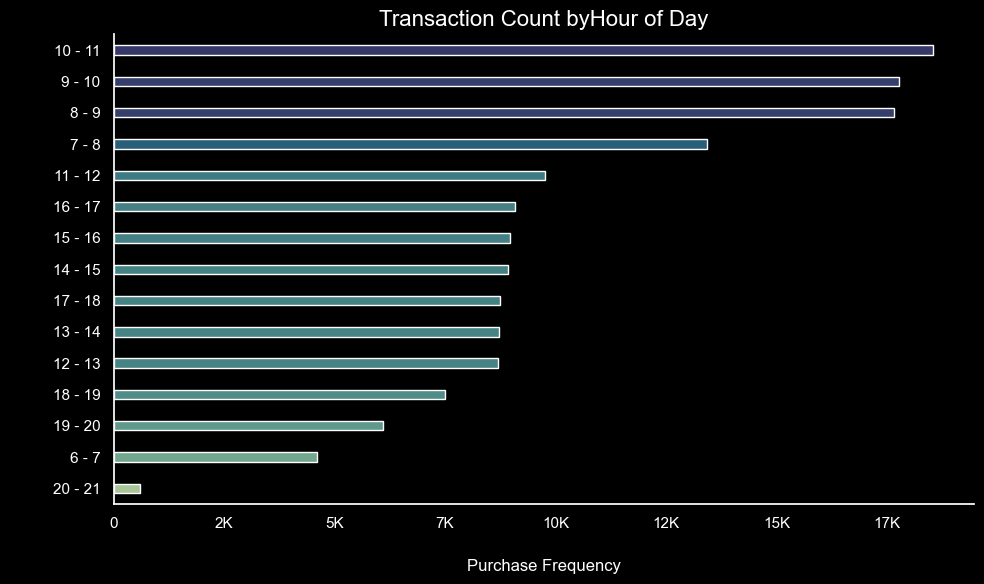

In [247]:
plot_data(df, 'time_range', 'frequency')

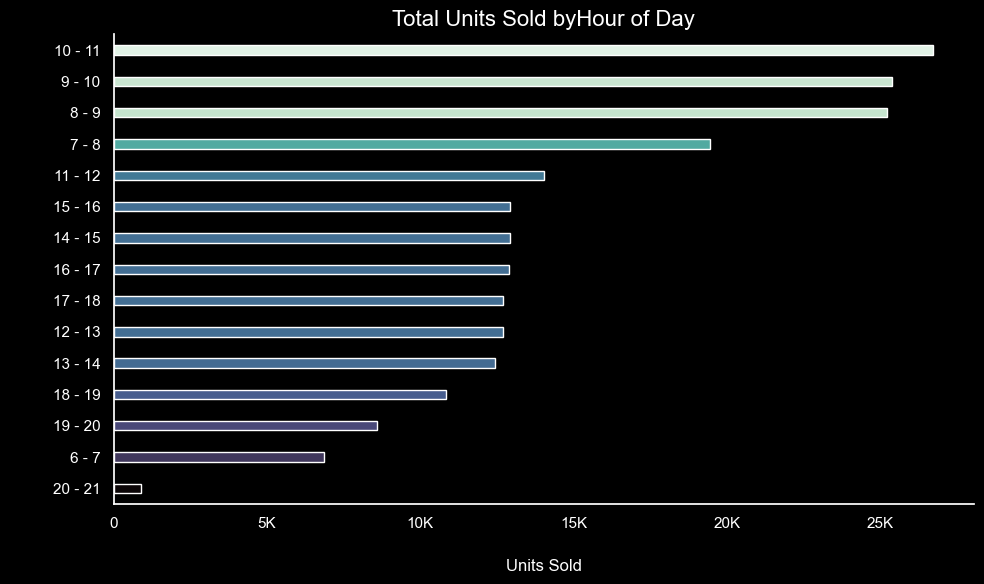

In [248]:
plot_data(df, 'time_range', 'volume', 'transaction_qty')

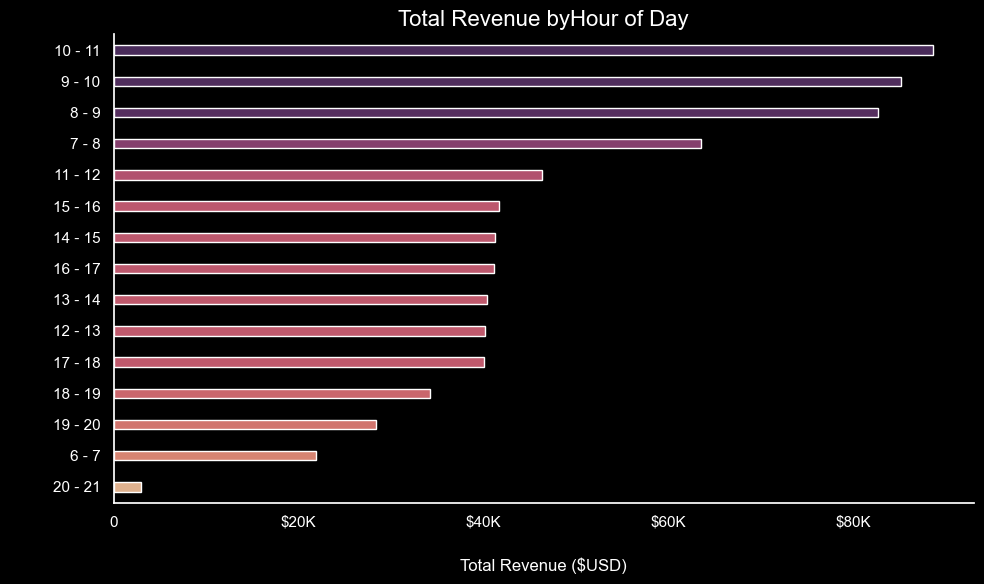

In [249]:
plot_data(df, 'time_range', 'revenue', 'revenue')

## Day

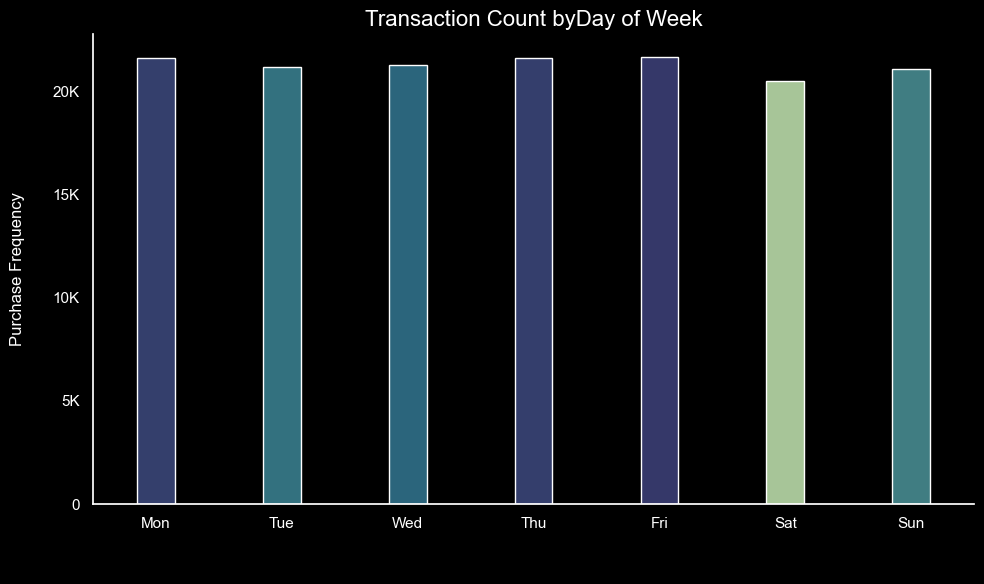

In [250]:
plot_data(df, 'day_name', 'frequency')

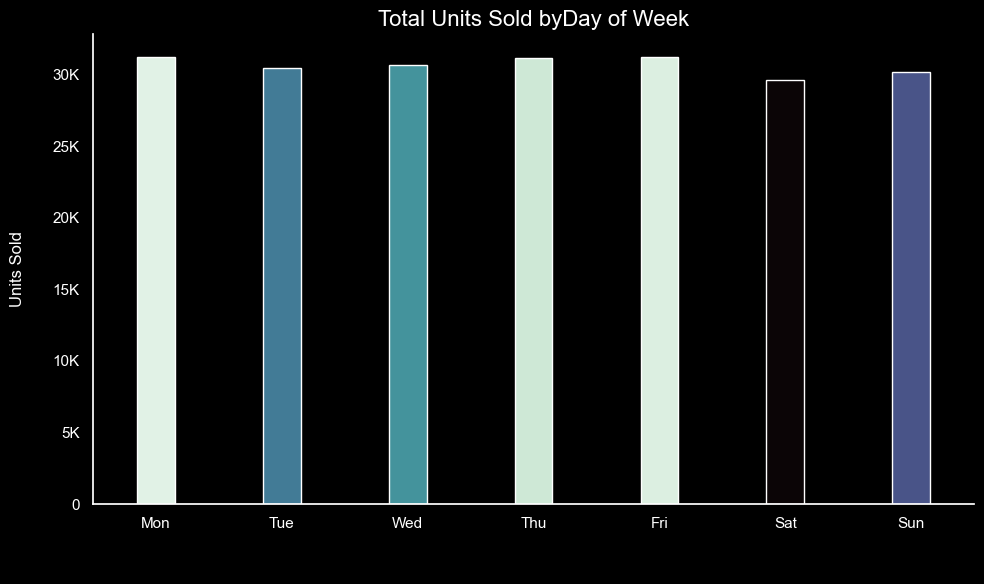

In [251]:
plot_data(df, 'day_name', 'volume', 'transaction_qty')

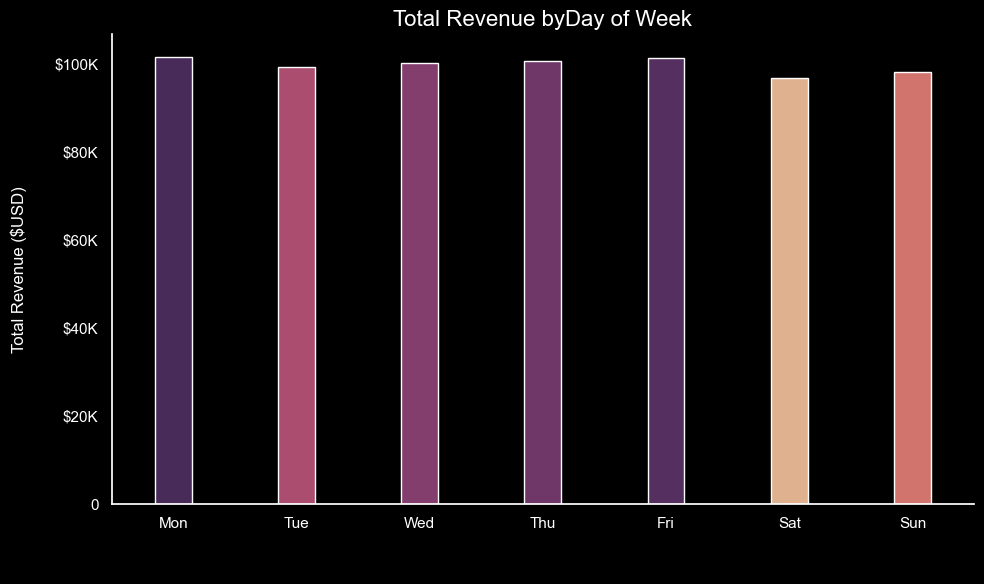

In [252]:
plot_data(df, 'day_name', 'revenue', 'revenue')

## Month

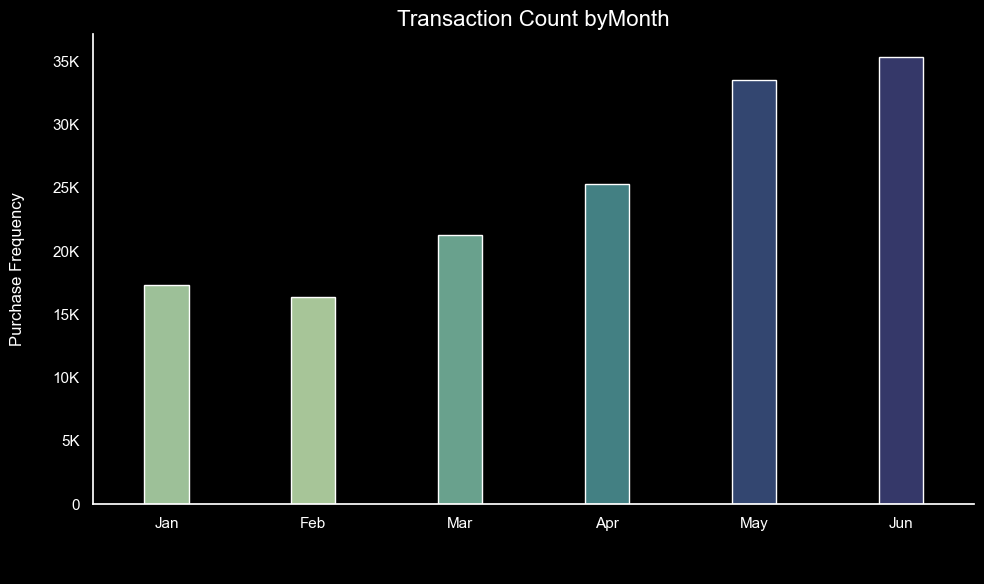

In [253]:
plot_data(df, 'transaction_month', 'frequency')

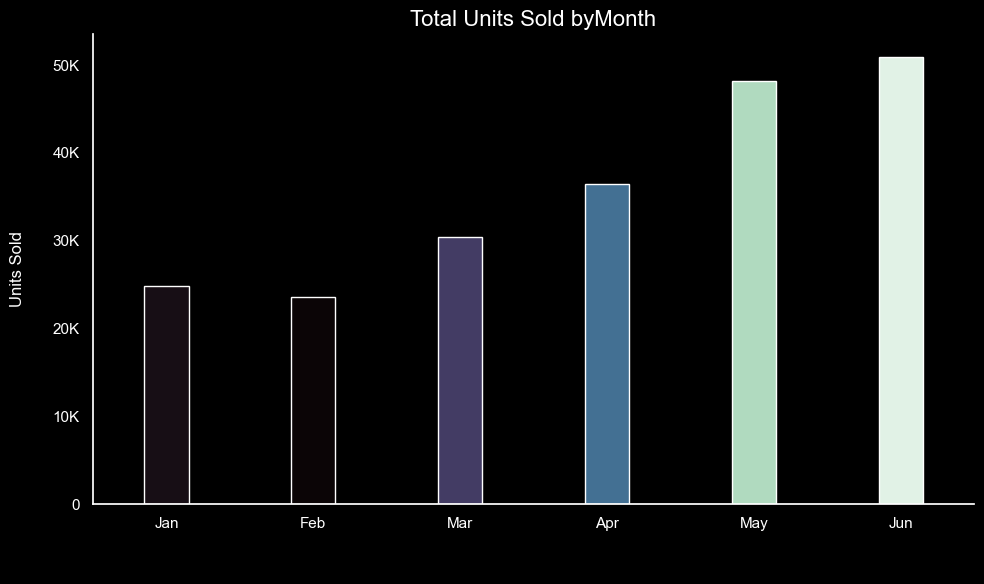

In [254]:
plot_data(df, 'transaction_month', 'volume', 'transaction_qty')

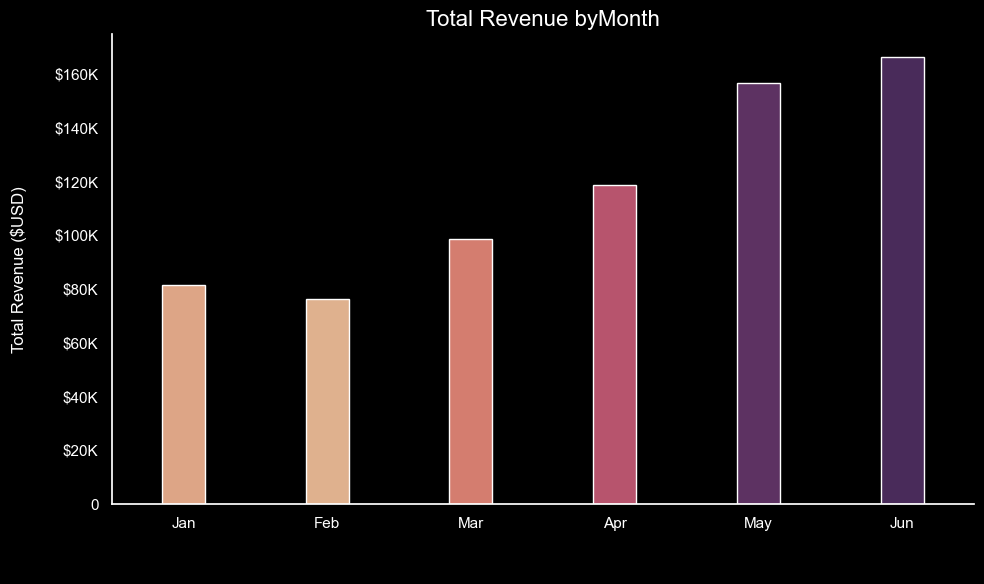

In [255]:
plot_data(df, 'transaction_month', 'revenue', 'revenue')

## Product category

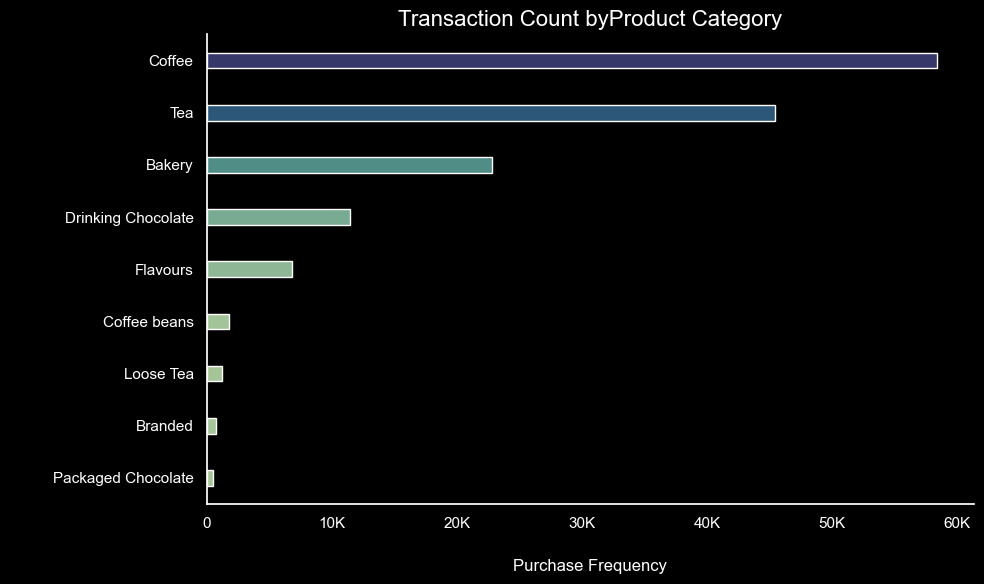

In [256]:
plot_data(df, 'product_category', 'frequency')

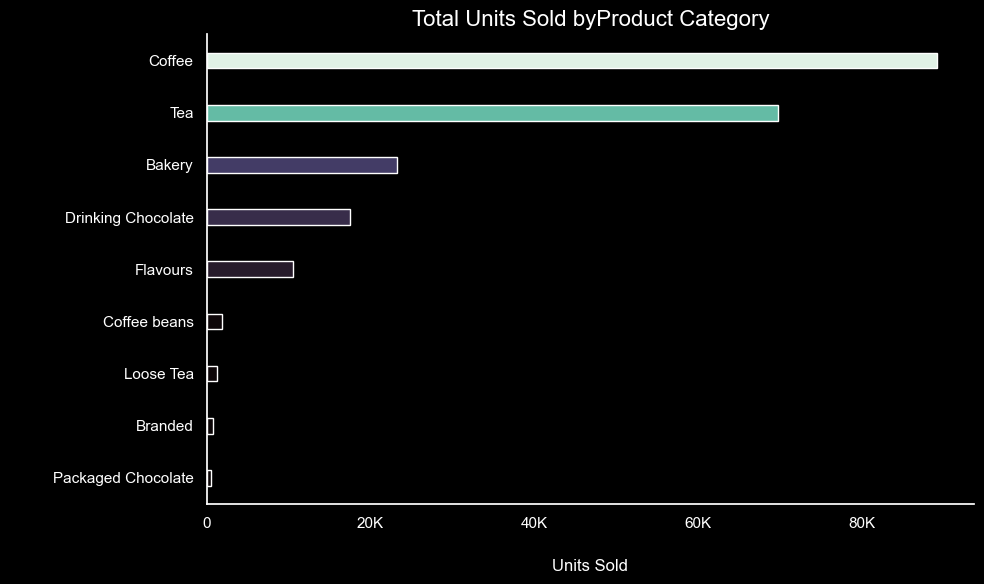

In [257]:
plot_data(df, 'product_category', 'volume', 'transaction_qty')

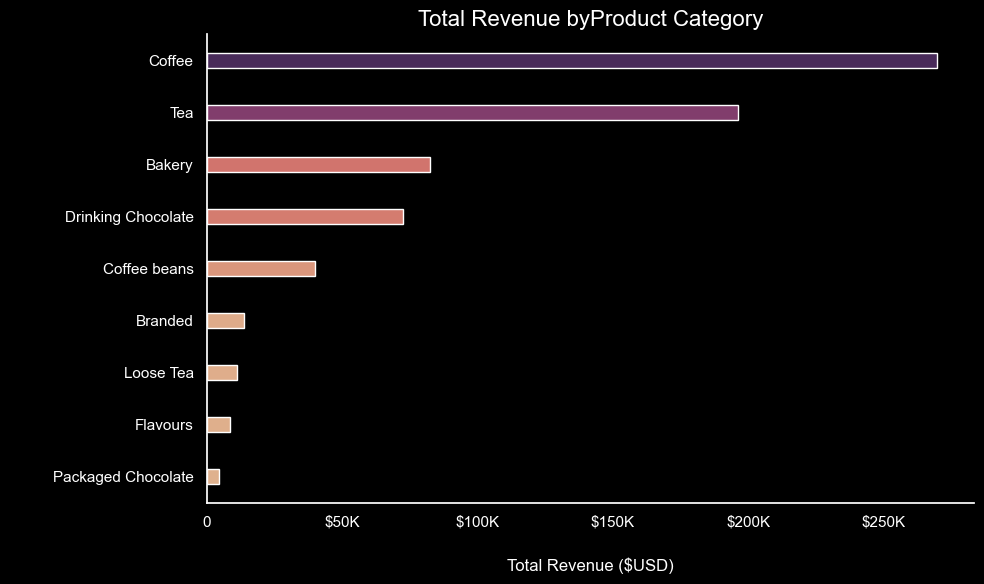

In [258]:
plot_data(df, 'product_category', 'revenue', 'revenue')

## Product Type



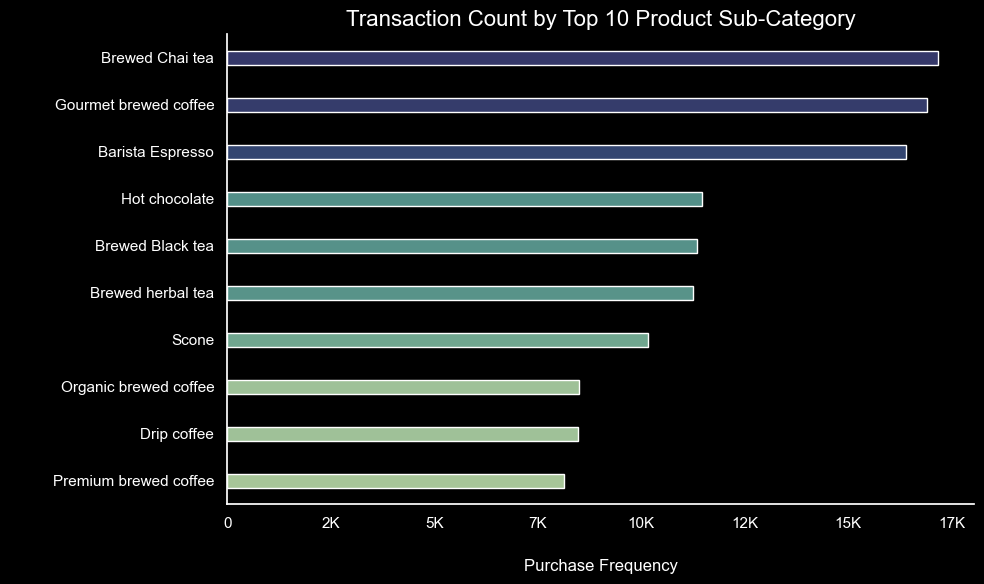

In [259]:
plot_data(df, 'product_type', 'frequency')

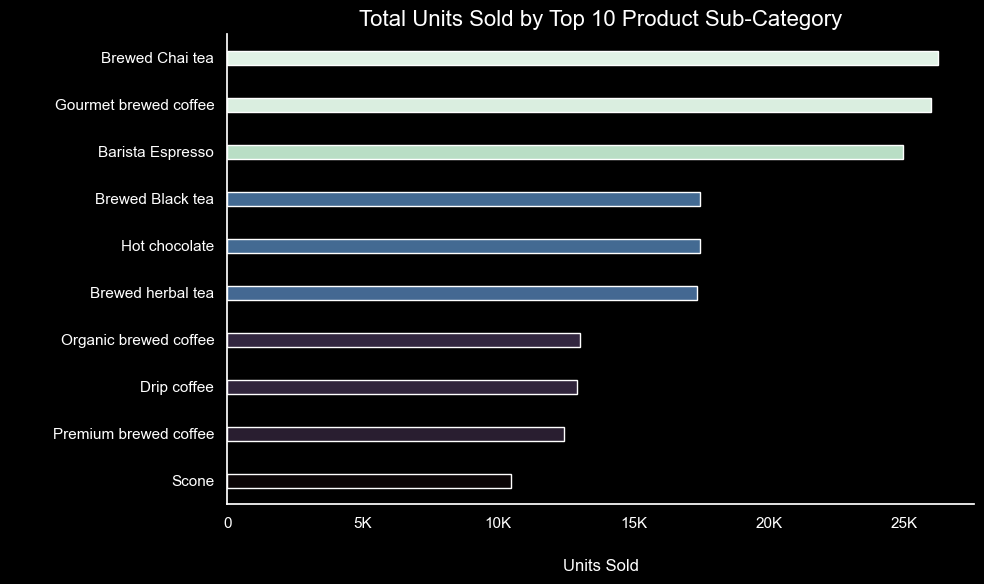

In [260]:
plot_data(df, 'product_type', 'volume', 'transaction_qty')

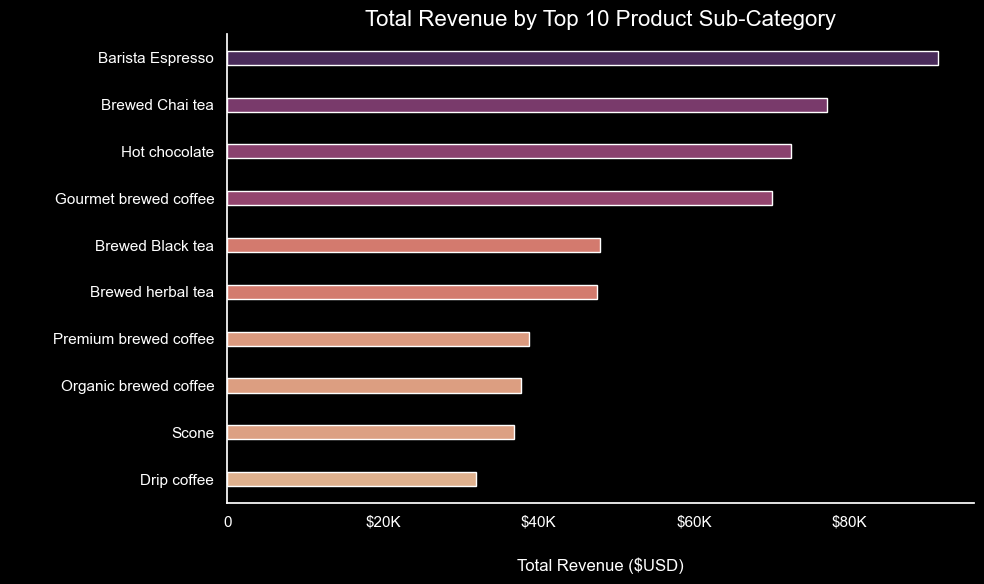

In [261]:
plot_data(df, 'product_type', 'revenue', 'revenue')

## Product Detail 

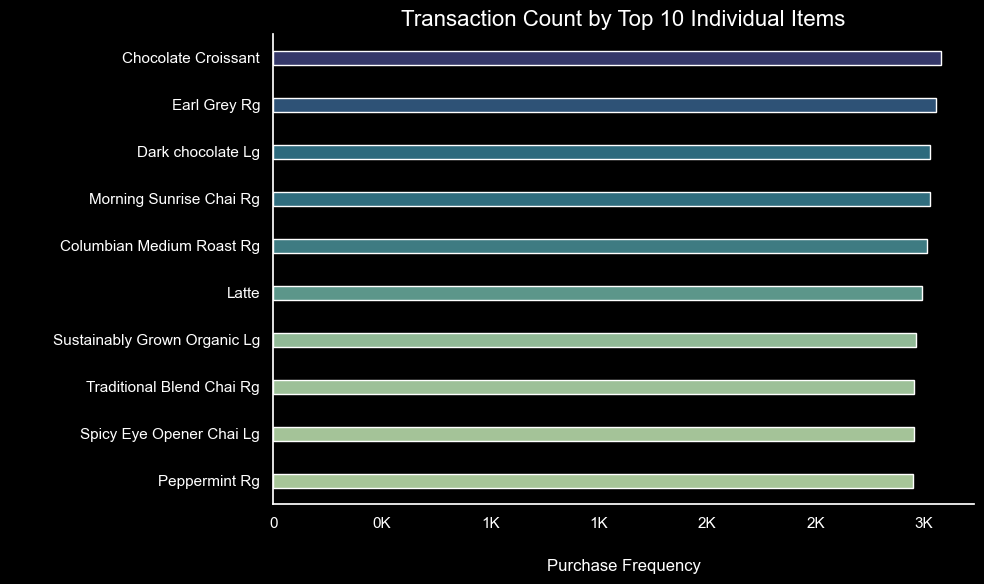

In [262]:
plot_data(df, 'product_detail', 'frequency')

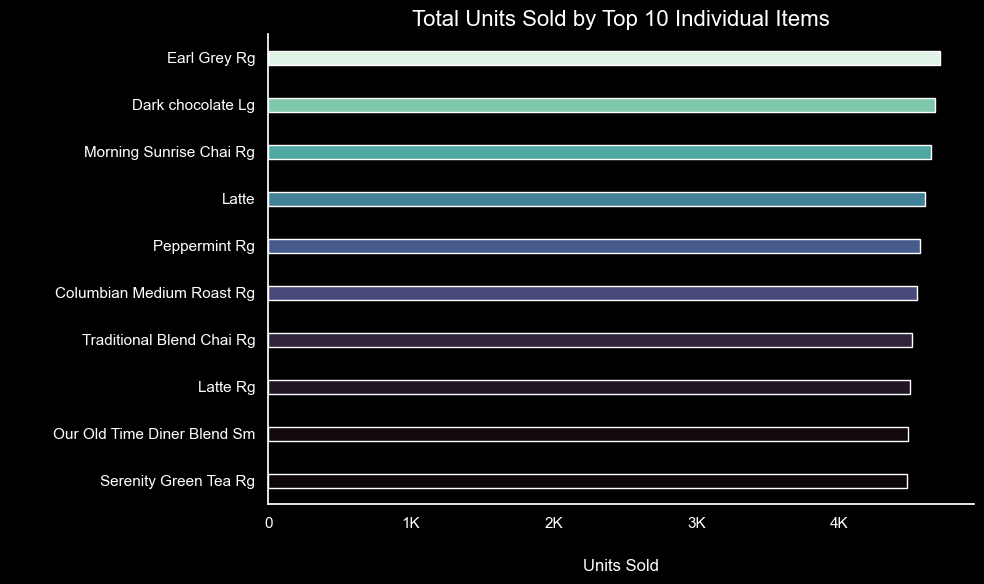

In [263]:
plot_data(df, 'product_detail', 'volume', 'transaction_qty')

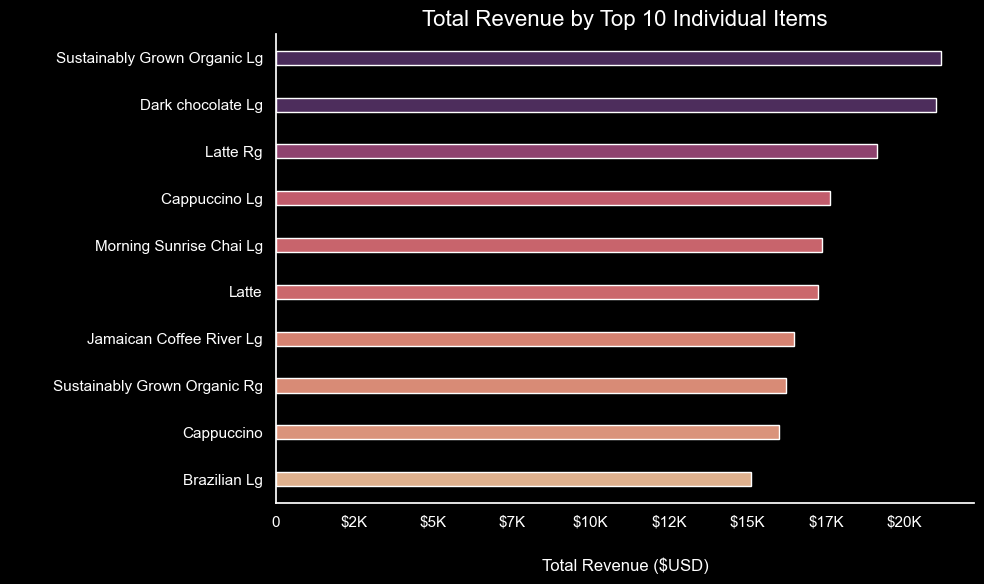

In [264]:
plot_data(df, 'product_detail', 'revenue', 'revenue')

## Store Location

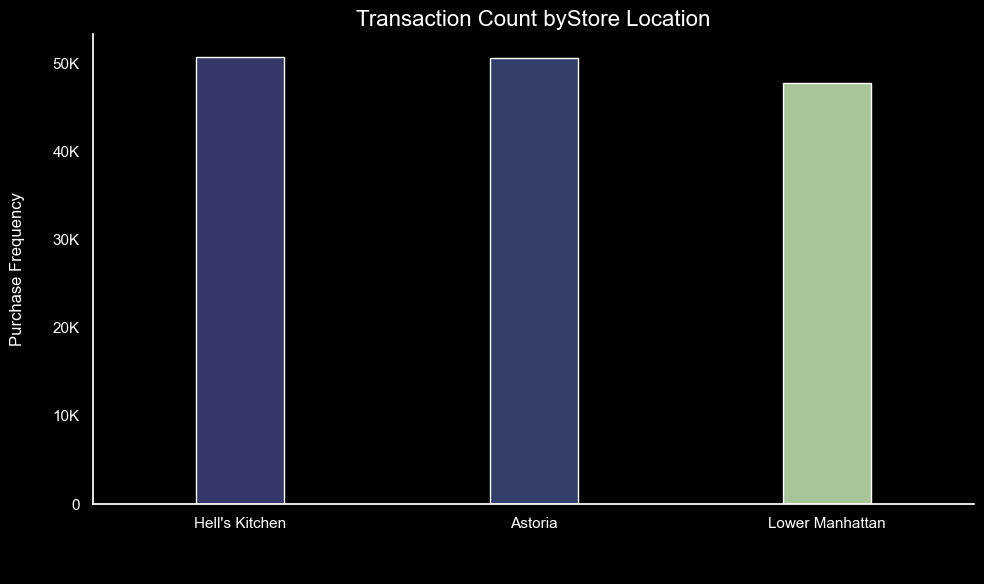

In [265]:
plot_data(df, 'store_location', 'frequency')

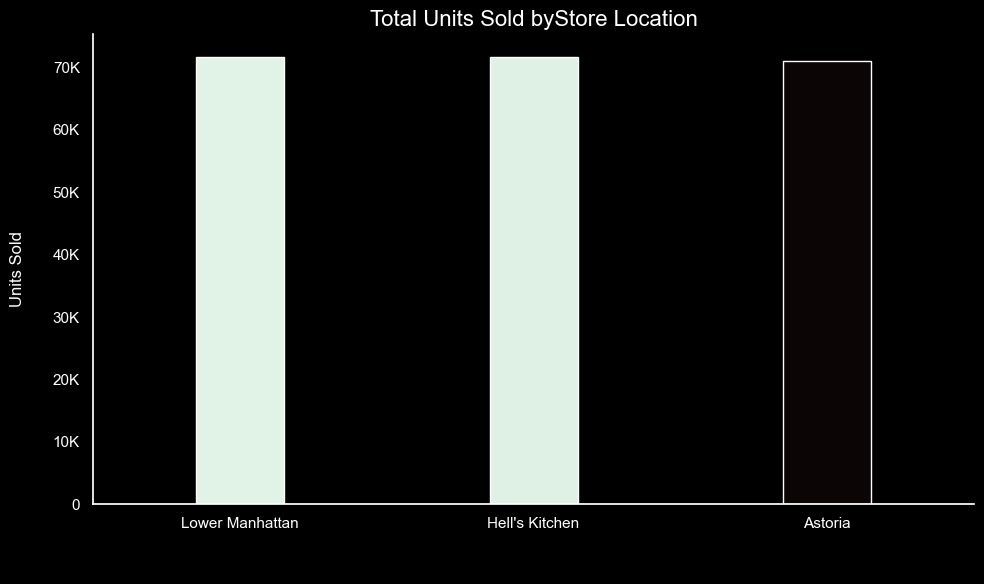

In [266]:
plot_data(df, 'store_location', 'volume', 'transaction_qty')

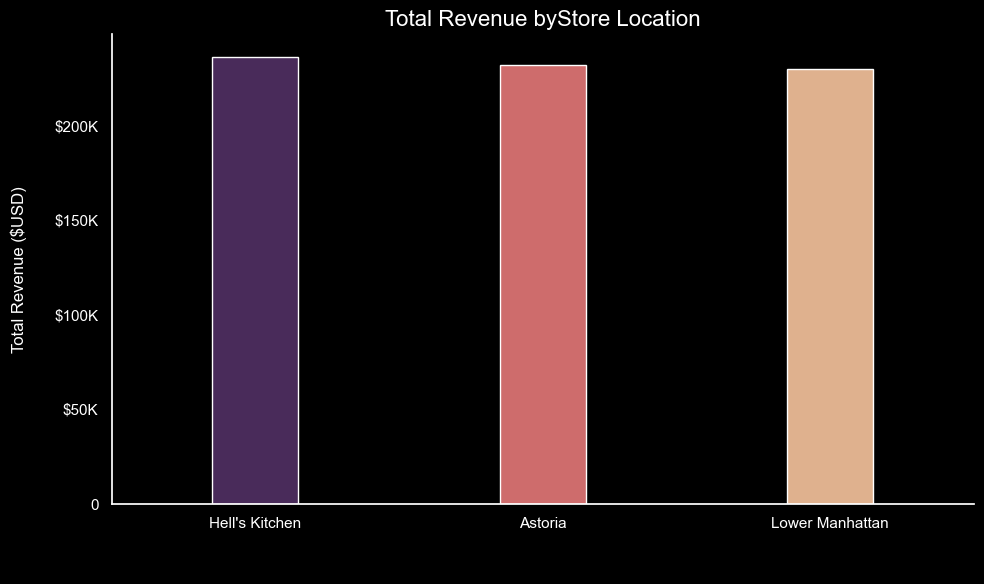

In [267]:
plot_data(df, 'store_location', 'revenue', 'revenue')

# EXPORTING THE FINAL DATA FILE

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  object        
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  int64         
 5   store_location     149116 non-null  object        
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  revenue            149116 non-null  float64       
 12  time_range         149116 non-null  object        
 13  day_name           149116 non-null  object  

In [269]:
file_name = 'modified_coffee_shop_sales.csv'
save_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data' 

full_path = os.path.join(save_path, file_name)

df.to_csv(full_path, index=False, encoding='utf-8')


# verifying if it worked 
print(f"exported successfully to: {full_path}")
print(f"approximate file size: {os.path.getsize(full_path) / (1024 * 1024):.1f} MB")

exported successfully to: D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data\modified_coffee_shop_sales.csv
approximate file size: 17.5 MB
